In [1]:
import numpy as np
import pickle
from pathlib import Path

from IPython.display import display
from lib.util_plot import *
from lib.constants import *
from lib.multilevel_analysis import *
from lib.pandas_impl import *
from lib.pandas_stats_VIS import *
from lib.matrix_analyzer import *
from lib.pandas_compute import *

import lib.FLY_preprocessing.fly_constants as FLY

### Data preparation

In [2]:
data_folder = Path.cwd() / 'data' / 'FLY'
meta_folder = data_folder / 'meta'
eval_folder = Path.cwd() / 'data' / 'eval' / 'FLY_optical'
eval_folder.mkdir(parents=True, exist_ok=True)
plot_folder = eval_folder / "plots"
plot_folder.mkdir(parents=True, exist_ok=True)

In [3]:
filename = eval_folder / "multilevel_analysis.pkl"
with open(filename, 'rb') as file:
    multilevel_analysis = pickle.load(file)

stats = multilevel_analysis.stats
df_summary = multilevel_analysis.df_summary

In [4]:
pre_ct_domain = [x for x in df_summary.index.get_level_values("pre_celltype").unique()]
post_ct_domain = [x for x in df_summary.index.get_level_values("post_celltype").unique()]

df_celltypes = pd.read_csv(meta_folder / "cell_types.csv")
ct_names_dict = df_celltypes.set_index("primary_type_id")["primary_type"].to_dict()
ct_name_id = df_celltypes.set_index("primary_type")["primary_type_id"].to_dict()

df_celltypes_optical = pd.read_csv(meta_folder / "selected_neurons_optical-lobes.csv")
ct_ids_optical = df_celltypes_optical["celltype_id"].unique().tolist()

In [5]:
def get_ct_ids(ct_names):
    return [ct_name_id[ct] for ct in ct_names]

In [6]:
initPlotSettings(False)

In [7]:
ct_selected_pre = ["L3", "CT1", "Mi4", "Tm16", "Dm12", "C3", "Tm20", "Tm1"]
ct_selected_pre_ids = get_ct_ids(ct_selected_pre)
ct_selected_pre_ids

[429, 7597, 69, 1, 862, 356, 213, 4]

In [8]:
df_foo = df_summary.reset_index()

selected_overlap = []

for overlap_volume_id in range(1,600):
    syn_empirical = df_foo[df_foo.post_celltype.isin(get_ct_ids(["Tm9"])) & df_foo.pre_celltype.isin(get_ct_ids(ct_selected_pre)) & df_foo.overlap_volume.isin([overlap_volume_id])][EMPIRICAL].sum()
    if(syn_empirical >= 3):
        selected_overlap.append(overlap_volume_id)

### Matrix plots

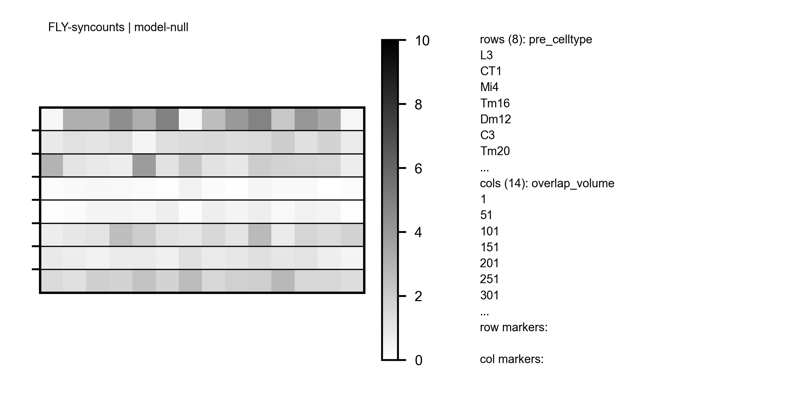

<Figure size 640x480 with 0 Axes>

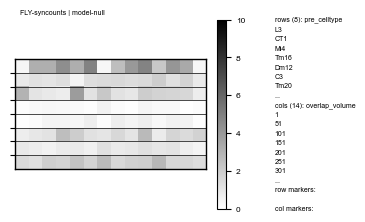

In [18]:
matrix_analyzer = ConnectomeMatrixAnalyzer(df_summary, plot_folder)
matrix_analyzer.set_selection(include_filter_and={
    #"overlap_volume" : [429, 7597, 69, 1, 862, 356, 213, 4],
    "post_celltype" : get_ct_ids(["Tm9"]),
    "pre_celltype" : get_ct_ids(ct_selected_pre),
},
exclude_filter={
    "pre_celltype" : [-1],
    "post_celltype" : [-1]
})
matrix_analyzer.set_data_columns(MODEL_NULL)
matrix_analyzer.build_matrix(["pre_celltype"], 
                             ["overlap_volume"],
                             row_domains = get_ct_ids(ct_selected_pre),  
                             col_domains = None,#ct_ids_optical,
                             value_label_map = {
                                 "pre_celltype" : ct_names_dict,
                                 "post_celltype" : ct_names_dict
                             },
                             aggregation_fn="mean",
                             default_value=-1)
matrix_analyzer.colormaps["binary"].set_under("white")
matrix_analyzer.render_matrix("FLY-syncounts", 
                              colormap_name="binary", vmin=0, vmax=10, normalization_function=None, 
                              col_separator_lines=False, row_separator_lines=True, high_res=False)

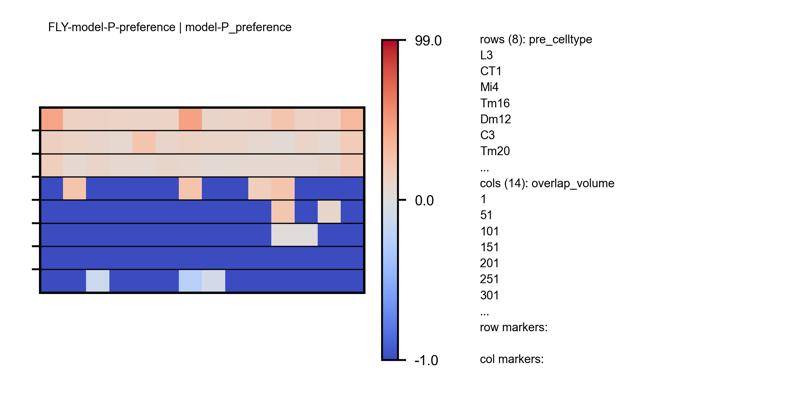

<Figure size 640x480 with 0 Axes>

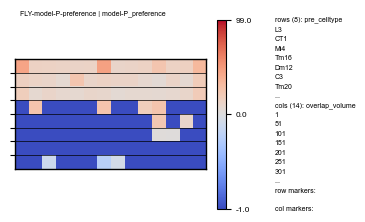

In [19]:
matrix_analyzer = ConnectomeMatrixAnalyzer(df_summary, plot_folder)
matrix_analyzer.set_selection(include_filter_and={
    #"overlap_volume" : [41, 264, 312, 334, 424, 463, 487],
    "post_celltype" : get_ct_ids(["Tm9"]),
    "pre_celltype" : get_ct_ids(ct_selected_pre),
},
exclude_filter={
    "pre_celltype" : [-1],
    "post_celltype" : [-1]
})
matrix_analyzer.set_data_columns("model-P_preference")
matrix_analyzer.build_matrix(["pre_celltype"], 
                             ["overlap_volume"],
                             row_domains = get_ct_ids(ct_selected_pre),  
                             col_domains = None,#ct_ids_optical,
                             value_label_map = {
                                 "pre_celltype" : ct_names_dict,
                                 "post_celltype" : ct_names_dict
                             },
                             aggregation_fn="mean",
                             default_value=-1)
matrix_analyzer.colormaps["binary"].set_under("white")
matrix_analyzer.render_matrix("FLY-model-P-preference", 
                              colormap_name="coolwarm", vmin=-1, vmax=1, normalization_function=NormalizePreferenceValue(0, 100),
                              col_separator_lines=False, row_separator_lines=True, high_res=False)